In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from sklearn.datasets import make_circles

In [22]:
data=make_circles()

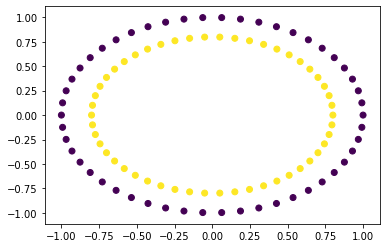

In [9]:
plt.scatter(data[0][:,0],data[0][:,1],c=data[1] )

In [11]:
from sklearn.cluster import KMeans

In [12]:
cluster=KMeans(n_clusters=2)

In [13]:
cluster.fit(data[0]) 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

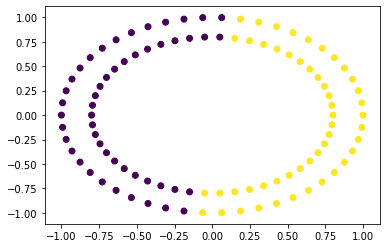

In [14]:
plt.scatter(data[0][:,0],data[0][:,1],c=cluster.labels_) 

#   USING CLASSIFICATION ALGORITHMS

In [15]:
df=pd.DataFrame(data[0],columns=['X','Y'])

In [17]:
X=df
y=data[1]

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [23]:
reg=LogisticRegression().fit(X_train,y_train)
tree=DecisionTreeClassifier().fit(X_train,y_train)
rfc=RandomForestClassifier().fit(X_train,y_train)
kne=KNeighborsClassifier(int(np.sqrt(len(y)))).fit(X_train,y_train)

In [24]:
preg=reg.predict(X_test)
ptree=tree.predict(X_test)
prfc=rfc.predict(X_test)
pkne=kne.predict(X_test) 

In [25]:
from sklearn.metrics import classification_report,confusion_matrix

In [26]:
print('reg')
print(classification_report(y_test,preg))
print(confusion_matrix(y_test,preg))
print('tree')
print(classification_report(y_test,ptree))
print(confusion_matrix(y_test,ptree))
print('rfc')
print(classification_report(y_test,prfc))
print(confusion_matrix(y_test,prfc))
print('kne')
print(classification_report(y_test,pkne))
print(confusion_matrix(y_test,pkne))

reg
              precision    recall  f1-score   support

           0       0.41      0.78      0.54         9
           1       0.33      0.09      0.14        11

    accuracy                           0.40        20
   macro avg       0.37      0.43      0.34        20
weighted avg       0.37      0.40      0.32        20

[[ 7  2]
 [10  1]]
tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        11

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

[[ 9  0]
 [ 0 11]]
rfc
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        11

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00

In [27]:
print(reg.score(X_test,y_test))
print(tree.score(X_test,y_test))
print(rfc.score(X_test,y_test))
print(kne.score(X_test,y_test))

0.4
1.0
1.0
0.55


# USING NEURAL NETWORK(MLP)

In [1]:
from sklearn.datasets import make_circles

In [3]:
X,y=make_circles(n_samples=1000,factor=0.2,noise=0.1,random_state=0)
# factor is space btw circles and noise is spreading

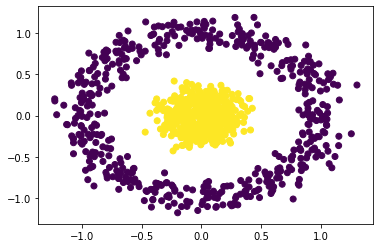

In [4]:
plt.scatter(X[:,0],X[:,1],c=y)

Text(0.5, 1.0, 'Blue circles and Red crosses')

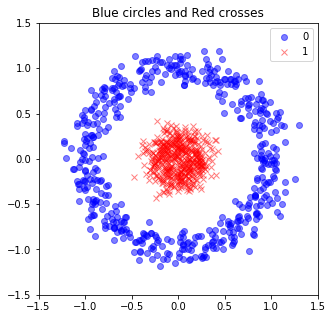

In [5]:
plt.figure(figsize=(5,5))
plt.plot(X[y==0, 0],X[y==0, 1],'ob', alpha=0.5)#this will use only that row in which y=0 as we have set the condition of the row bcoz first arg in [] is row
plt.plot(X[y==1, 0],X[y==1, 1],'xr', alpha=0.5)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.legend(['0', '1'])
plt.title("Blue circles and Red crosses")


In [6]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [7]:
model = Sequential()

In [8]:
model.add(Dense(4, input_shape=(2,), activation='relu'))

In [9]:
model.add(Dense(1, activation='sigmoid'))

In [10]:
model.compile(optimizer='adam',loss= 'binary_crossentropy', metrics=['accuracy'])

In [15]:
model.fit(X, y, epochs=100)

Epoch 1/100
1000/1000 [==============================] - 0s 81us/step - loss: 0.3075 - accuracy: 0.8710
Epoch 2/100
1000/1000 [==============================] - 0s 98us/step - loss: 0.3074 - accuracy: 0.8700
Epoch 3/100
1000/1000 [==============================] - 0s 78us/step - loss: 0.3074 - accuracy: 0.8710
Epoch 4/100
1000/1000 [==============================] - 0s 63us/step - loss: 0.3072 - accuracy: 0.8700
Epoch 5/100
1000/1000 [==============================] - 0s 66us/step - loss: 0.3073 - accuracy: 0.8710
Epoch 6/100
1000/1000 [==============================] - 0s 65us/step - loss: 0.3072 - accuracy: 0.8710
Epoch 7/100
1000/1000 [==============================] - 0s 88us/step - loss: 0.3072 - accuracy: 0.8710
Epoch 8/100
1000/1000 [==============================] - 0s 50us/step - loss: 0.3070 - accuracy: 0.8710
Epoch 9/100
1000/1000 [==============================] - 0s 52us/step - loss: 0.3071 - accuracy: 0.8710
Epoch 10/100
1000/1000 [==============================] - 0s 52u

1000/1000 [==============================] - 0s 80us/step - loss: 0.3056 - accuracy: 0.8740
Epoch 80/100
1000/1000 [==============================] - 0s 66us/step - loss: 0.3056 - accuracy: 0.8740
Epoch 81/100
1000/1000 [==============================] - 0s 47us/step - loss: 0.3055 - accuracy: 0.8740
Epoch 82/100
1000/1000 [==============================] - 0s 58us/step - loss: 0.3057 - accuracy: 0.8740
Epoch 83/100
1000/1000 [==============================] - 0s 57us/step - loss: 0.3055 - accuracy: 0.8740
Epoch 84/100
1000/1000 [==============================] - 0s 47us/step - loss: 0.3055 - accuracy: 0.8740
Epoch 85/100
1000/1000 [==============================] - 0s 57us/step - loss: 0.3055 - accuracy: 0.8740
Epoch 86/100
1000/1000 [==============================] - 0s 61us/step - loss: 0.3056 - accuracy: 0.8740
Epoch 87/100
1000/1000 [==============================] - 0s 49us/step - loss: 0.3056 - accuracy: 0.8740
Epoch 88/100
1000/1000 [==============================] - 0s 48us/st